In [ ]:
import torch
from torch import nn

torch.__version__

'2.4.0+cu121'

In [ ]:
device ='cuda' if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
import requests
import zipfile
from pathlib import Path

#setup path to a data folder

data_path = Path('data/')
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
  print(f"{image_path} directory already exists... skipping download")
else:
  print(f"{image_path} does not exist, creating one...")
  image_path.mkdir(parents=True,exist_ok=True)


with open(data_path/"pizza_steak_sushi.zip",'wb') as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak, sushi data....")
  f.write(request.content)

with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip",'r') as zip_ref:
  print("Unzipping pizza. steak and shshi data...")
  zip_ref.extractall(image_path)

data/pizza_steak_sushi does not exist, creating one...
Unzipping pizza. steak and shshi data...


In [ ]:
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [ ]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.


In [ ]:
train_dir = image_path/'train'
test_dir = image_path/'test'

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

data/pizza_steak_sushi/train/pizza/2154394.jpg
pizza
Random image path :data/pizza_steak_sushi/train/pizza/2154394.jpg
Image class: pizza
Image height: 512
Image width: 512


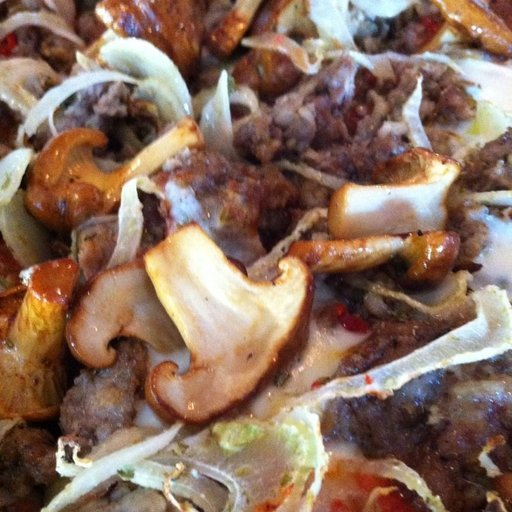

In [ ]:
#Visualizing an image
import random
from PIL import Image

# set seed
#random.seed(42)

#get all the image path
image_path_list = list(image_path.glob("*/*/*jpg"))

#random image path
random_image_path = random.choice(image_path_list)

print(random_image_path)
image_class = random_image_path.parent.stem
print(image_class)

#open Image
img = Image.open(random_image_path)

#5. print metadata
print(f"Random image path :{random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

Text(0.5, 1.0, 'image class:pizza | image shape:(512, 512, 3)')

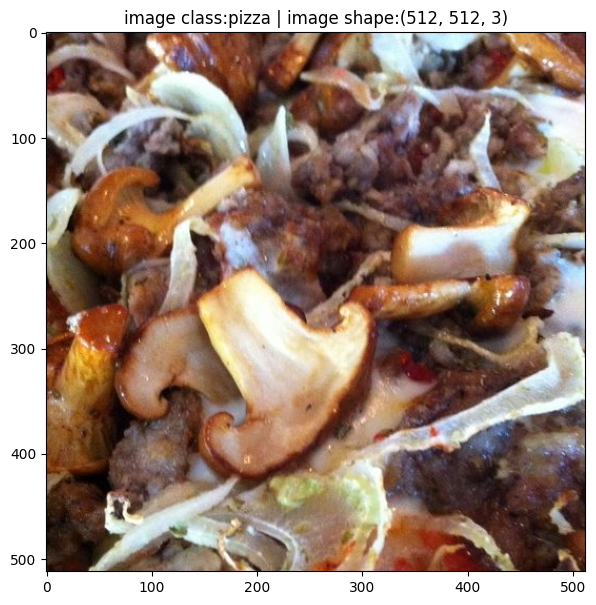

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# turn the image into array
img_as_array = np.asarray(img)

plt.figure(figsize= (10,7))
plt.imshow(img_as_array)
plt.title(f"image class:{image_class} | image shape:{img_as_array.shape}")

In [ ]:
#Transformimg data

import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [ ]:
data_transform(img).shape

torch.Size([3, 64, 64])

In [ ]:
def plot_transformed_images(image_paths,transform,n=3,seed=None):

  if seed:
    random.seed(seed)

  random_image_paths = random.sample(image_paths,k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1,ncols=2,)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis(False)

      transformed_image = transform(f).permute(1,2,0)

      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nshape: {transformed_image.shape}")
      ax[1].axis('off')

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)




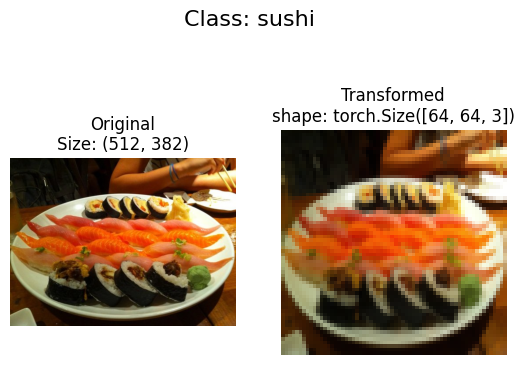

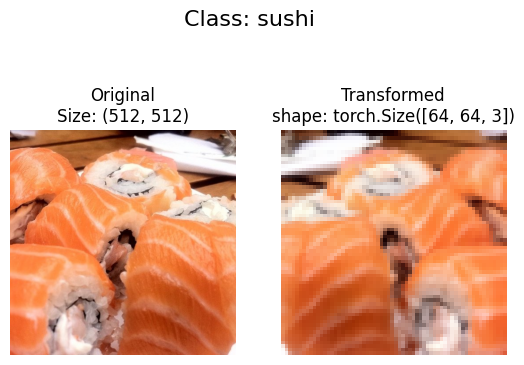

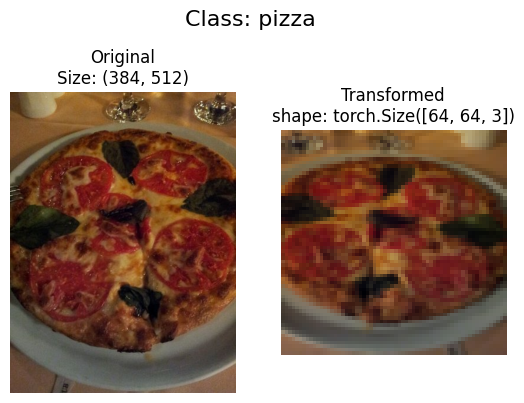

In [ ]:
plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3)

In [ ]:
#loading image data

from torchvision import datasets
train_data = datasets.ImageFolder(root= train_dir,
                                  transform=data_transform,
                                  target_transform=None)
test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform,
                                 )
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [ ]:
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [ ]:
# get_class name as list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:
# get class name as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
len(train_data), len(test_data)

(225, 75)

In [ ]:
train_data.samples[0]

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [ ]:
img, label =train_data[0][0], train_data[0][1]

In [ ]:
class_names[label]

'pizza'

In [ ]:
img.shape

torch.Size([3, 64, 64])

In [ ]:
img_permute = img.permute(1,2,0)

img_permute.shape

torch.Size([64, 64, 3])

Text(0.5, 1.0, 'pizza')

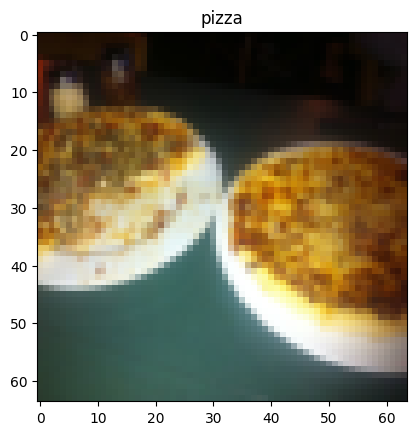

In [ ]:
plt.imshow(img_permute)
plt.title(class_names[label])

In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE = 1

train_dataloader = DataLoader(train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=1,
                              shuffle=True)

test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=1,
                             shuffle=False)

print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader : {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader : {len(test_dataloader)} batches of {BATCH_SIZE}")


Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7b3af5dcfe80>, <torch.utils.data.dataloader.DataLoader object at 0x7b3af5dce770>)
Length of train dataloader : 225 batches of 1
Length of test dataloader : 75 batches of 1


In [ ]:
img, label = next(iter(train_dataloader))

print(f"img shape: {img.shape} -> [batch_size, color_channel,height, weight]")
print(label.shape)

img shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channel,height, weight]
torch.Size([1])


In [ ]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset

from torchvision import transforms
from typing import Tuple, Dict, List

In [ ]:
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [ ]:
# creating a helper function

target_directory = train_dir
print(target_directory)

class_name_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_name_found

data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [ ]:
list(os.scandir(target_directory))



[<DirEntry 'pizza'>, <DirEntry 'sushi'>, <DirEntry 'steak'>]

In [ ]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str,int]]:
  # get the class name
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes in {directory} ...please check file directory")

  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}

  return classes, class_to_idx

In [ ]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [ ]:
# create a custome dataset to replicate `ImageFolder`

from torch.utils.data import Dataset

class ImageFolderCustom(Dataset):
  def __init__(self,targ_dir:str,
               transform=None):
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
    self.transform = transform
    self.classes, self.class_to_idx = find_classes(targ_dir)

  def load_image(self,index:int)-> Image.Image:
    image_path = self.paths[index]
    return Image.open(image_path)

  def __len__(self) -> int:
    return len(self.paths)

  def __getitem__(self, index:int) -> Tuple[torch.Tensor, int]:
    img = self.load_image(index)
    class_name = self.paths[index].parent.name
    class_idx = self.class_to_idx[class_name]

    if self.transform:
      return self.transform(img), class_idx
    else:
      return img, class_idx

In [ ]:
#create a tranforms
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [ ]:
# test out ImageFolderCustom
train_data_custom = ImageFolderCustom(
    targ_dir=train_dir,
    transform=train_transforms
)

test_data_custom = ImageFolderCustom(
    targ_dir=test_dir ,
    transform = test_transforms
)

In [ ]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7b3af5d9ca30>,
 <__main__.ImageFolderCustom at 0x7b3af5d9e710>)

In [ ]:
len(train_data), len(train_data_custom)

(225, 225)

In [ ]:
len(test_data), len(test_data_custom)

(75, 75)

In [ ]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [ ]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
# check for equality
print(train_data_custom.classes == train_data.classes)
print(test_data_custom.classes == test_data.classes)

True
True


In [ ]:
#create a funtion to display random image

def display_random_images(dataset: torch.utils.data.Dataset,
                          classes : List[str]=None,
                          n: int = 10,
                          display_shape:bool = True,
                          seed: int = None):

  if n> 10:
    n=10
    dispaly_shape= False

  if seed:
    random.seed(seed)

  random_samples_idx = random.sample(range(len(dataset)),k=n)

  plt.figure(figsize=(16,8))

  for i, targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    targ_image_adjust = targ_image.permute(1,2,0)

    plt.subplot(1,n,i+1)
    plt.imshow(targ_image_adjust)
    plt.axis("off")
    if classes:
      title = f"class: {classes[targ_label]}"
      if display_shape:
        title = title + f"\nshape: {targ_image_adjust.shape}"
    plt.title(title)



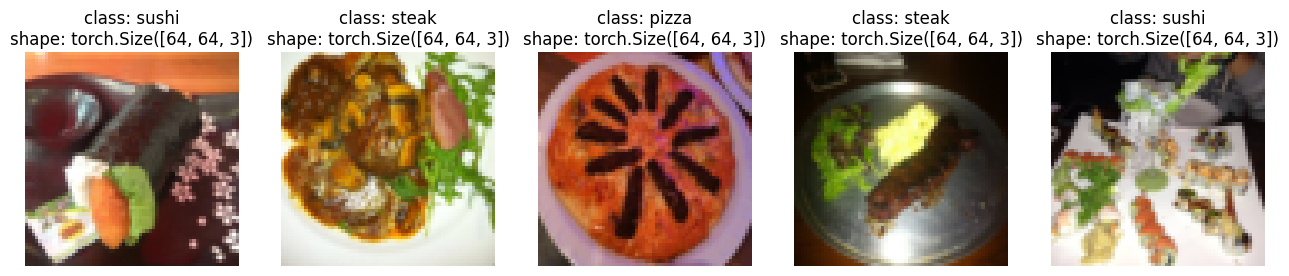

In [ ]:
display_random_images(train_data,
                      n=5,
                      classes=class_names,seed=None)

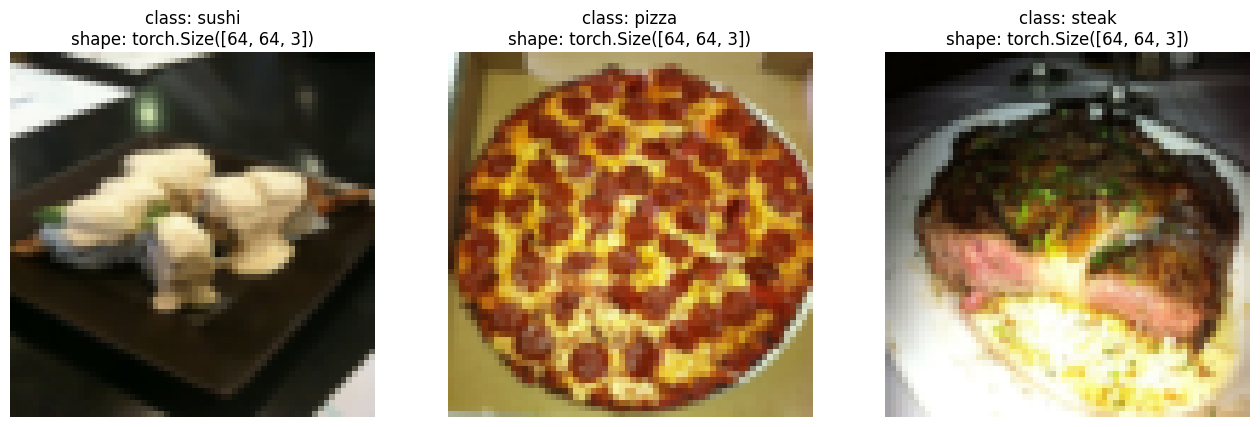

In [ ]:
display_random_images(train_data_custom,
                      n=3,
                      classes = class_names,
                      seed=None)

In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE = 1

train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=BATCH_SIZE,
                                     num_workers=0,
                                     shuffle=True)
test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                     batch_size=BATCH_SIZE,
                                     num_workers=0,
                                     shuffle=False)

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7b3af5b7e230>,
 <torch.utils.data.dataloader.DataLoader at 0x7b3af5b7ed10>)

In [ ]:
img_custom, label_custom = next(iter(train_dataloader_custom))
img_custom.shape, label_custom.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1]))

In [ ]:
# other forms of transforms

# lets trivial agument

from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=5),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor()
])

In [ ]:
#get all the image paths

image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/test/pizza/309892.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2124579.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2111981.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/930553.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/1687143.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2019408.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/195160.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/971934.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2236338.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2508636.jpg')]

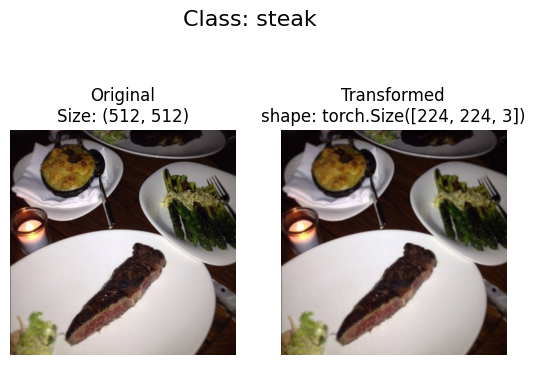

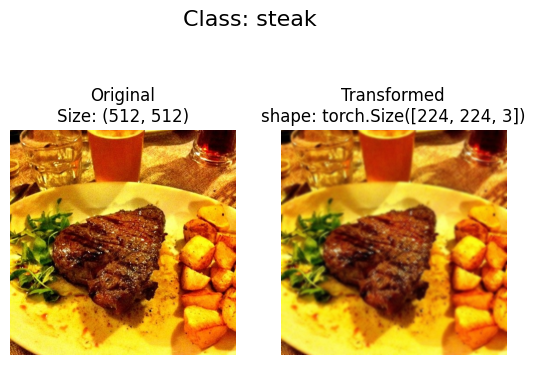

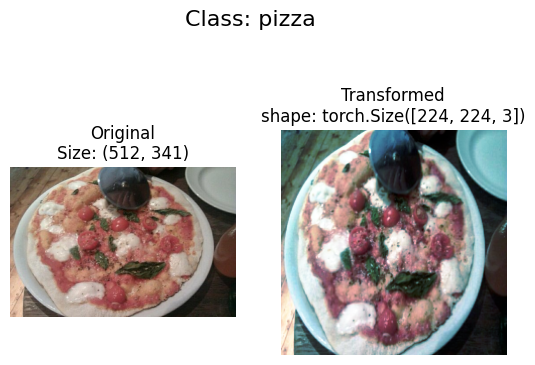

In [ ]:
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transform,
    n=3,seed=None
)

In [ ]:
# model

simple_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [ ]:
# load and transform data
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir,
                                         transform=simple_transform)

# trun datasets into DataLoaders
import os
from torch.utils.data import DataLoader

#setup batch size and number of works
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()


#create dataloader
train_dataloader_simple = DataLoader(dataset=train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     num_workers=NUM_WORKERS,
                                     shuffle=True)
test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                     batch_size=BATCH_SIZE,
                                     num_workers=NUM_WORKERS)


In [ ]:
#model

class TinyVGG(nn.Module):
  def __init__(self,input_shape:int,
               hidden_units:int,
               output_shape:int)-> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,padding=0
                  ),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,padding=0
                  ),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=10*13*13,
                  out_features=output_shape)
    )

  def forward(self,x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x

In [ ]:
torch.manual_seed(42)

model_0 = TinyVGG(
    input_shape=3,
    hidden_units=10,
    output_shape=len(class_names)
).to(device)

In [ ]:
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [ ]:
# try forward pass on single image
image_batch, label_batch = next(iter(train_dataloader_simple))

image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [ ]:
image_batch = image_batch.to(device)
model_0(image_batch)

tensor([[ 2.0795e-02, -1.9510e-03,  9.5212e-03],
        [ 1.8440e-02,  2.4668e-03,  6.6609e-03],
        [ 1.7695e-02,  1.0282e-03,  9.4975e-03],
        [ 2.4446e-02, -3.3489e-03,  9.5877e-03],
        [ 1.9939e-02,  6.9131e-04,  1.0778e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0046e-03],
        [ 2.0996e-02,  1.6415e-04,  1.2481e-02],
        [ 2.1566e-02, -1.9607e-03,  9.7175e-03],
        [ 2.4500e-02, -4.7904e-03,  8.5394e-03],
        [ 2.0239e-02, -4.7979e-04,  1.0907e-02],
        [ 2.2219e-02, -4.1816e-04,  9.8173e-03],
        [ 2.2318e-02, -2.1642e-03,  9.4428e-03],
        [ 2.1851e-02, -3.7225e-03,  8.3784e-03],
        [ 2.2881e-02, -1.7559e-03,  1.0299e-02],
        [ 2.1635e-02, -4.3995e-03,  9.4990e-03],
        [ 2.2101e-02, -4.1469e-03,  9.3904e-03],
        [ 2.1226e-02, -4.4215e-03,  1.1476e-02],
        [ 2.1698e-02, -2.7458e-03,  8.4966e-03],
        [ 1.9974e-02, -3.1665e-07,  8.4496e-03],
        [ 1.8308e-02,  1.6378e-03,  8.5491e-03],
        [ 2.0768e-02

In [ ]:
### torchinfo

! pip install torchinfo

In [ ]:
import torchinfo
from torchinfo import summary

summary(model_0,input_size=[1,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

In [ ]:

def train_step(model : torch.nn.Module,
               dataloader : torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer : torch.optim,
               device: device
               ):
  model.train()
  train_loss , train_acc =0,0
  for batch, (X,y) in enumerate(dataloader):

    X, y = X.to(device), y.to(device)

    y_logits = model(X)

    loss =loss_fn(y_logits, y)

    train_loss += loss.item()

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    y_pred = torch.argmax(torch.softmax(y_logits, dim=1),dim=1)

    train_acc +=  (y_pred==y).sum().item()/len(y_pred)

  train_loss = train_loss/len(dataloader)
  train_acc = train_acc/len(dataloader)
  return train_loss, train_acc

def test_step(model : torch.nn.Module,
               dataloader : torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               device
               ):
  model.eval()
  with torch.inference_mode():
    test_loss , test_acc =0,0
    for batch, (X_test,y_test) in enumerate(dataloader):

      X_test, y_test = X_test.to(device), y_test.to(device)

      y_test_logits = model(X_test)

      t_loss =loss_fn(y_test_logits, y_test)

      test_loss += t_loss.item()

      y_test_pred = torch.argmax(torch.softmax(y_test_logits, dim=1),dim=1)

      test_acc +=  (y_test_pred==y_test).sum().item()/len(y_test_pred)

  test_loss = test_loss/len(dataloader)
  test_acc = test_acc/len(dataloader)
  return test_loss, test_acc




In [ ]:
def train(model,train_dataloader,
          test_dataloader,device,
          epochs=10):
  epochs = epochs
  loss_fn = torch.nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

  for epoch in range(epochs):
    train_loss, train_acc = train_step(model,train_dataloader,
                                       loss_fn,optimizer,device)
    test_loss, test_acc = test_step(model,test_dataloader,
                                       loss_fn,device)
    print(f"Epoch: {epoch} | Train loss:{train_loss:.3f} acc:{train_acc:.2f} | Test loss:{test_loss:.3f} acc:{test_acc:2f}")

In [ ]:
train(model_0,train_dataloader_simple,test_dataloader_simple,device)

Epoch: 0 | Train loss:1.110 acc:0.28 | Test loss:1.099 acc:0.197917
Epoch: 1 | Train loss:1.087 acc:0.41 | Test loss:1.146 acc:0.197917
Epoch: 2 | Train loss:1.086 acc:0.41 | Test loss:1.182 acc:0.197917
Epoch: 3 | Train loss:1.079 acc:0.41 | Test loss:1.175 acc:0.197917
Epoch: 4 | Train loss:1.070 acc:0.41 | Test loss:1.170 acc:0.197917
Epoch: 5 | Train loss:1.054 acc:0.41 | Test loss:1.155 acc:0.197917
Epoch: 6 | Train loss:1.087 acc:0.29 | Test loss:1.109 acc:0.197917
Epoch: 7 | Train loss:1.037 acc:0.38 | Test loss:1.032 acc:0.524621
Epoch: 8 | Train loss:1.027 acc:0.51 | Test loss:1.053 acc:0.331439
Epoch: 9 | Train loss:0.953 acc:0.50 | Test loss:0.948 acc:0.524621
